In [1]:
%load_ext lab_black

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Needed to get autocomplete to not take forever in damn! jupyter lab! GRRRR...
%config Completer.use_jedi = False

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Generate data with various distributions

- The data is generated with several pathalogical distribution
- It is then tweaked so that the range of the data is more or less similar as seen by the variance of the min, max and range of each of the variables.
- Next the variables are normalized using $\mu$ and $\sigma$
- After this transformation the variance of min, max and range of each of these variables has in fact increased indicating that after the normalization they are less "aligned" than they were before normalization!
- This is done to illustrate the point that after the normalization can in fact decrease the "alignment" of variables unless they are normal.
- The assertion is that the reason why normalization using $\mu$ and $\sigma$ works is only because it assumes data to be more or less normal in which case the variables are converted to z-scores and the expectations is that values would fall roughly between -6 to 6.  But with non-normal data the reverse happens.
- Finally min/max transform is presented as it strictly aligns the data.

In [5]:
rand = np.random.RandomState(seed=1234)
n = 1000

uniform = rand.uniform(-3.5, 3.5, n)
normal = rand.normal(size=n)
exponential = rand.exponential(size=n) - 3
lognormal = rand.lognormal(size=n) / 2.5 - 3
chisquare = rand.chisquare(df=2, size=n) / 2 - 3
beta = (rand.beta(0.2, 1, size=n) * 6) - 3
df = pd.DataFrame(
    {
        "uniform": uniform,
        "normal": normal,
        "exponential": exponential,
        "lognormal": lognormal,
        "chisquare": chisquare,
        "beta": beta,
    }
)

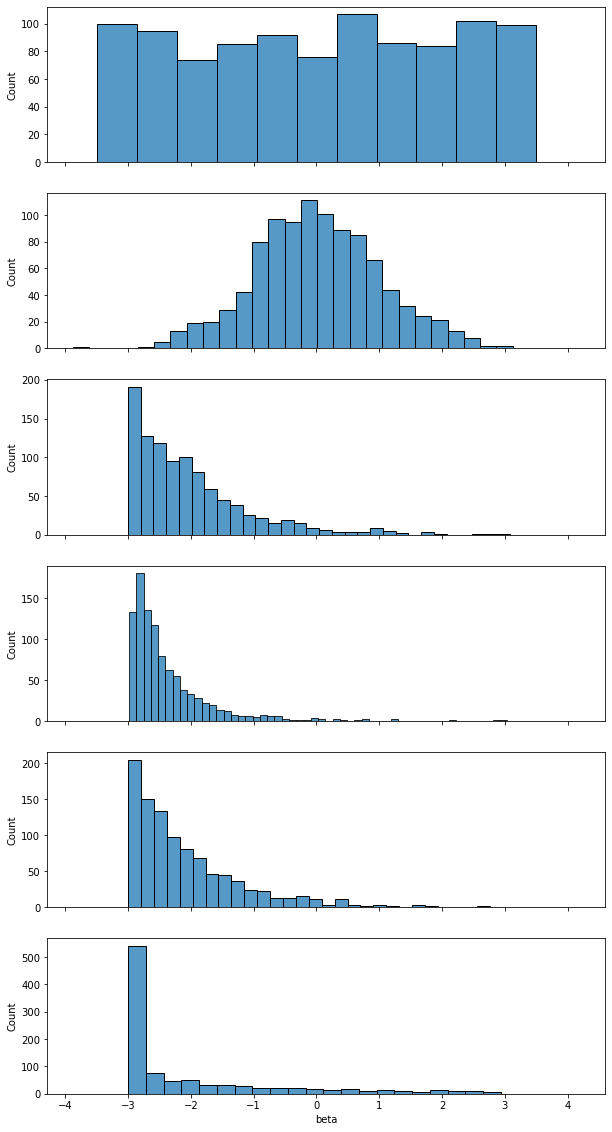

In [6]:
fig, axs = plt.subplots(nrows=6, sharex=True, figsize=(10, 20))
for i, col in enumerate(df.columns):
    _ = sns.histplot(df[col], ax=axs[i])

In [7]:
df.max() - df.min()

uniform        6.988940
normal         7.006534
exponential    6.087239
lognormal      6.022479
chisquare      7.196185
beta           5.938962
dtype: float64

In [8]:
df.min().var(), df.max().var(), (df.max() - df.min()).var()

(0.14201095066175, 0.22341616334975556, 0.3367690453441461)

In [9]:
max_ = max(df.max())
min_ = min(df.min())
range_ = max_ - min_

print(f"Range of values across all columns: max: {max_}, min: {min_}, range: {range_}")

Range of values across all columns: max: 4.196612510081364, min: -3.880898411336608, range: 8.077510921417971


## Now we normalize the variables

In [10]:
df2 = (df - df.mean()) / df.std()

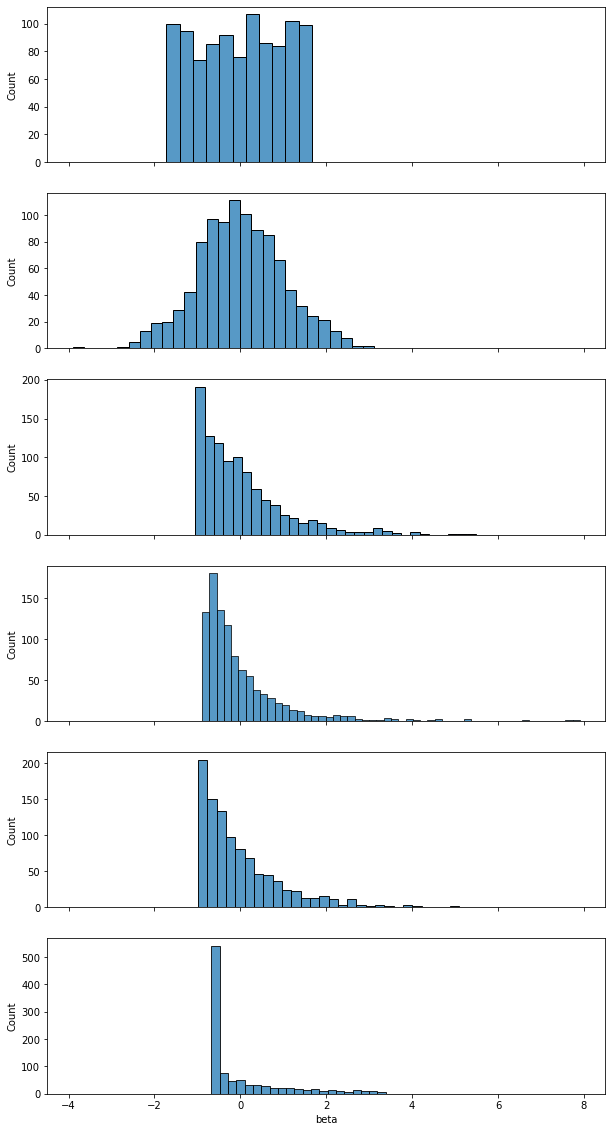

In [11]:
fig, axs = plt.subplots(nrows=6, sharex=True, figsize=(10, 20))
for i, col in enumerate(df.columns):
    _ = sns.histplot(df2[col], ax=axs[i])

In [15]:
df2.max() - df2.min()

uniform        3.386318
normal         7.023523
exponential    6.536441
lognormal      8.801934
chisquare      7.602576
beta           4.061219
dtype: float64

In [16]:
df2.min().var(), df2.max().var(), (df2.max() - df2.min()).var()

(1.468067416454166, 5.603942513057076, 4.402471246173136)

In [17]:
max_ = max(df2.max())
min_ = min(df2.min())
range_ = max_ - min_

print(f"Range of values across all columns: max: {max_}, min: {min_}, range: {range_}")

Range of values across all columns: max: 7.909507760696444, min: -3.9051717423942605, range: 11.814679503090705


## Min max transform

In [18]:
df3 = (df - df.min()) / (df.max() - df.min())

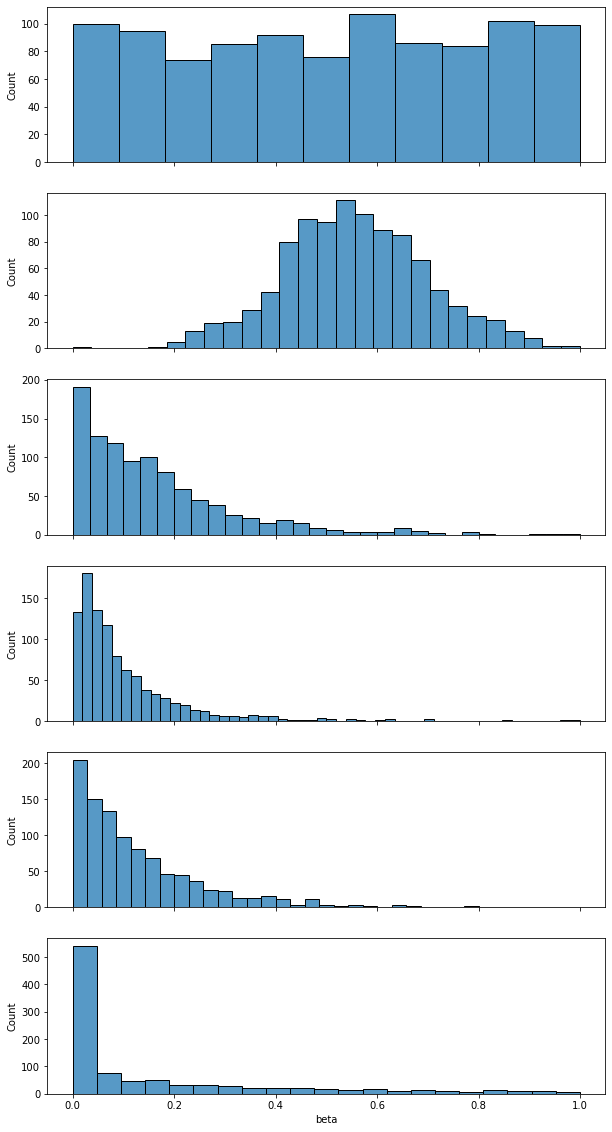

In [19]:
fig, axs = plt.subplots(nrows=6, sharex=True, figsize=(10, 20))
for i, col in enumerate(df.columns):
    _ = sns.histplot(df3[col], ax=axs[i])

In [20]:
df3.min().var(), df3.max().var(), (df3.max() - df3.min()).var()

(0.0, 0.0, 0.0)

In [21]:
max_ = max(df3.max())
min_ = min(df3.min())
range_ = max_ - min_

print(f"Range of values across all columns: max: {max_}, min: {min_}, range: {range_}")

Range of values across all columns: max: 1.0, min: 0.0, range: 1.0
